In [4]:
import pandas as pd
import numpy as np

In [5]:
pd.set_option('display.max_columns', 100)

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# baseline_model
- original data

In [4]:
#models
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

#cv
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True, random_state=0)
#mse
from sklearn.metrics import mean_squared_error as mse

## models

In [5]:
lgb = LGBMRegressor()
xgb = XGBRegressor()
rf = RandomForestRegressor()

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## cv

In [7]:
#train data cv
for i, (idx_train, idx_cv) in enumerate(cv.split(train)):
    df_train = train.iloc[idx_train]
    df_cv = train.iloc[idx_cv]
    
    x_train = df_train.drop(['price','id','date'], axis=1)
    y_train = df_train['price']
    x_cv = df_cv.drop(['price','id','date'], axis=1)
    y_cv = df_cv['price']
    
    print('[K =',i,']')
    
    print('<lgb>')
    lgb.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, lgb.predict(x_train))),
                                                np.sqrt(mse(y_cv, lgb.predict(x_cv)))) )
    print('<xgb>')
    xgb.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, xgb.predict(x_train))),
                                                np.sqrt(mse(y_cv, xgb.predict(x_cv)))) )
    print('<rf>')
    rf.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, rf.predict(x_train))),
                                                np.sqrt(mse(y_cv, rf.predict(x_cv)))) )

[K = 0 ]
<lgb>
train rmse = 86527.41985781804, cv rmse = 120877.95409097402
<xgb>
train rmse = 113027.19238171316, cv rmse = 128529.46698874752
<rf>
train rmse = 58780.970369950475, cv rmse = 143158.20390703165
[K = 1 ]
<lgb>
train rmse = 84275.29893860308, cv rmse = 129753.21710156751
<xgb>
train rmse = 115102.82441951036, cv rmse = 133171.8212678405
<rf>
train rmse = 62072.935602855614, cv rmse = 138792.4620123438
[K = 2 ]
<lgb>
train rmse = 87644.82868143154, cv rmse = 130181.88663499807
<xgb>
train rmse = 114090.59921410528, cv rmse = 129256.29915783062
<rf>
train rmse = 60920.78236288863, cv rmse = 134004.02458614
[K = 3 ]
<lgb>
train rmse = 87260.19867661956, cv rmse = 126159.91195567728
<xgb>
train rmse = 113392.03523263495, cv rmse = 147884.32092346592
<rf>
train rmse = 60079.63878457294, cv rmse = 148826.5305474855
[K = 4 ]
<lgb>
train rmse = 84688.40387304332, cv rmse = 137830.24033161864
<xgb>
train rmse = 113708.43692966465, cv rmse = 138035.84256658275
<rf>
train rmse = 63

## lgb_sub

In [8]:
x_train = train.drop(['price','id','date'], axis=1)
y_train = train['price']
x_test = test.drop(['id','date'], axis=1)

lgb.fit(x_train, y_train)
lgb_pred = lgb.predict(x_test)

xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

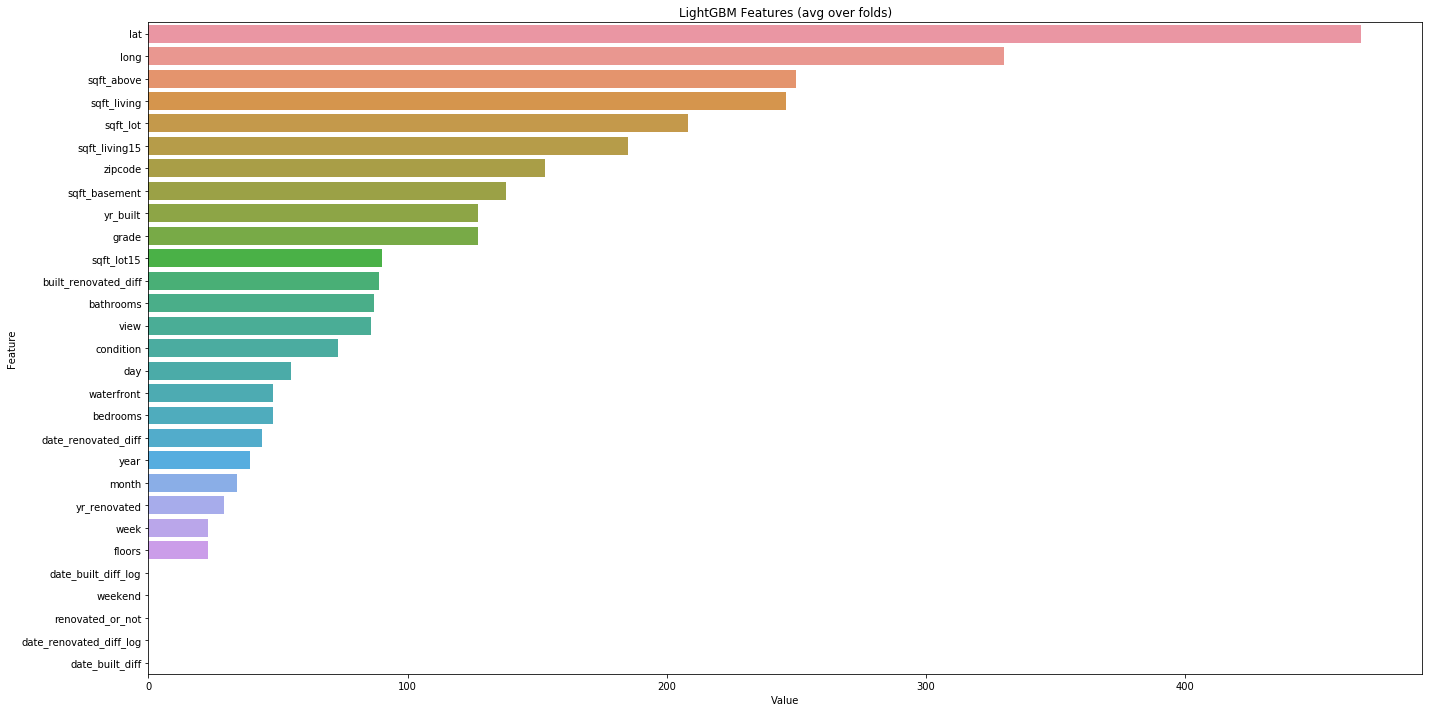

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [42]:
lgb_sub = pd.DataFrame({'id' : test.id, 'price' : lgb_pred})
#lgb_sub.to_csv('../sub/190311_lgb_base.csv', index = False) - 97477.86490

## ensemble_sub(xgb,lgb,rf 평균)

In [44]:
esb_pred = (lgb_pred+xgb_pred+rf_pred)/3
esb_sub = pd.DataFrame({'id' : test.id, 'price' : esb_pred})
#esb_sub.to_csv('../sub/190311_ensemble_base.csv', index = False) - 99665.60234

# 190312 추가 feature

## cv

In [7]:
#train data cv
for i, (idx_train, idx_cv) in enumerate(cv.split(train)):
    df_train = train.iloc[idx_train]
    df_cv = train.iloc[idx_cv]
    
    x_train = df_train.drop(['price','id','date'], axis=1)
    y_train = df_train['price']
    x_cv = df_cv.drop(['price','id','date'], axis=1)
    y_cv = df_cv['price']
    
    print('[K =',i,']')
    
    print('<lgb>')
    lgb.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, lgb.predict(x_train))),
                                                np.sqrt(mse(y_cv, lgb.predict(x_cv)))) )
    print('<xgb>')
    xgb.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, xgb.predict(x_train))),
                                                np.sqrt(mse(y_cv, xgb.predict(x_cv)))) )
    print('<rf>')
    rf.fit(x_train, y_train)
    print("train rmse = {}, cv rmse = {}".format(np.sqrt(mse(y_train, rf.predict(x_train))),
                                                np.sqrt(mse(y_cv, rf.predict(x_cv)))) )

[K = 0 ]
<lgb>
train rmse = 83586.85494080526, cv rmse = 130819.71791705558
<xgb>
train rmse = 113501.51232535412, cv rmse = 142563.86377201814
<rf>
train rmse = 60921.858471321204, cv rmse = 149490.81796252463
[K = 1 ]
<lgb>
train rmse = 85631.01176065755, cv rmse = 123195.92707663277
<xgb>
train rmse = 111019.58972731953, cv rmse = 136267.52148458862
<rf>
train rmse = 61032.69920047033, cv rmse = 143064.4608201023
[K = 2 ]
<lgb>
train rmse = 87102.2649953744, cv rmse = 111473.35897226988
<xgb>
train rmse = 112798.66547733528, cv rmse = 125476.24328091065
<rf>
train rmse = 65762.07879333306, cv rmse = 144880.82347338062
[K = 3 ]
<lgb>
train rmse = 81156.52807182992, cv rmse = 144766.78544173337
<xgb>
train rmse = 111982.61796717868, cv rmse = 148689.67717375114
<rf>
train rmse = 57180.45361867009, cv rmse = 153445.17319194716
[K = 4 ]
<lgb>
train rmse = 87189.62519882331, cv rmse = 118720.47454939855
<xgb>
train rmse = 113997.98954751341, cv rmse = 134133.3251890215
<rf>
train rmse = 

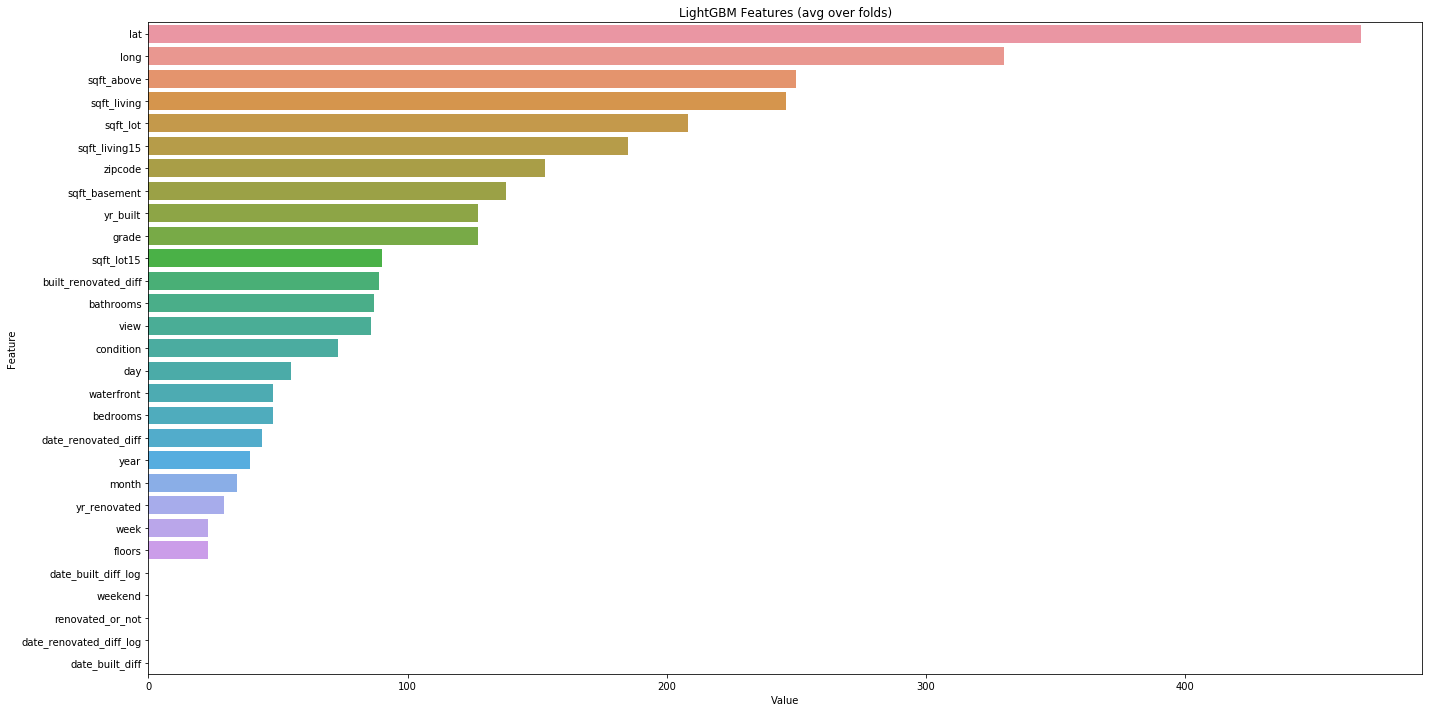

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [14]:
x_train = train.drop(['price','id','date'], axis=1)
y_train = train['price']
x_test = test.drop(['id','date'], axis=1)

lgb.fit(x_train, y_train)
lgb_pred = lgb.predict(x_test)

In [15]:
lgb_sub = pd.DataFrame({'id' : test.id, 'price' : lgb_pred})
lgb_sub.to_csv('../sub/190312_lgb_base2.csv', index = False) #120459.06824 

# train2, test2

In [7]:
train2 = pd.read_csv('../input/train2.csv')
test2 = pd.read_csv('../input/test2.csv')

In [11]:
from lightgbm import LGBMRegressor

In [12]:
lgb = LGBMRegressor()

In [13]:
x_train = train2.drop(['price','id','date'], axis=1)
y_train = train2['price']
x_test = test2.drop(['id','date'], axis=1)

lgb.fit(x_train, y_train)
lgb_pred = lgb.predict(x_test)

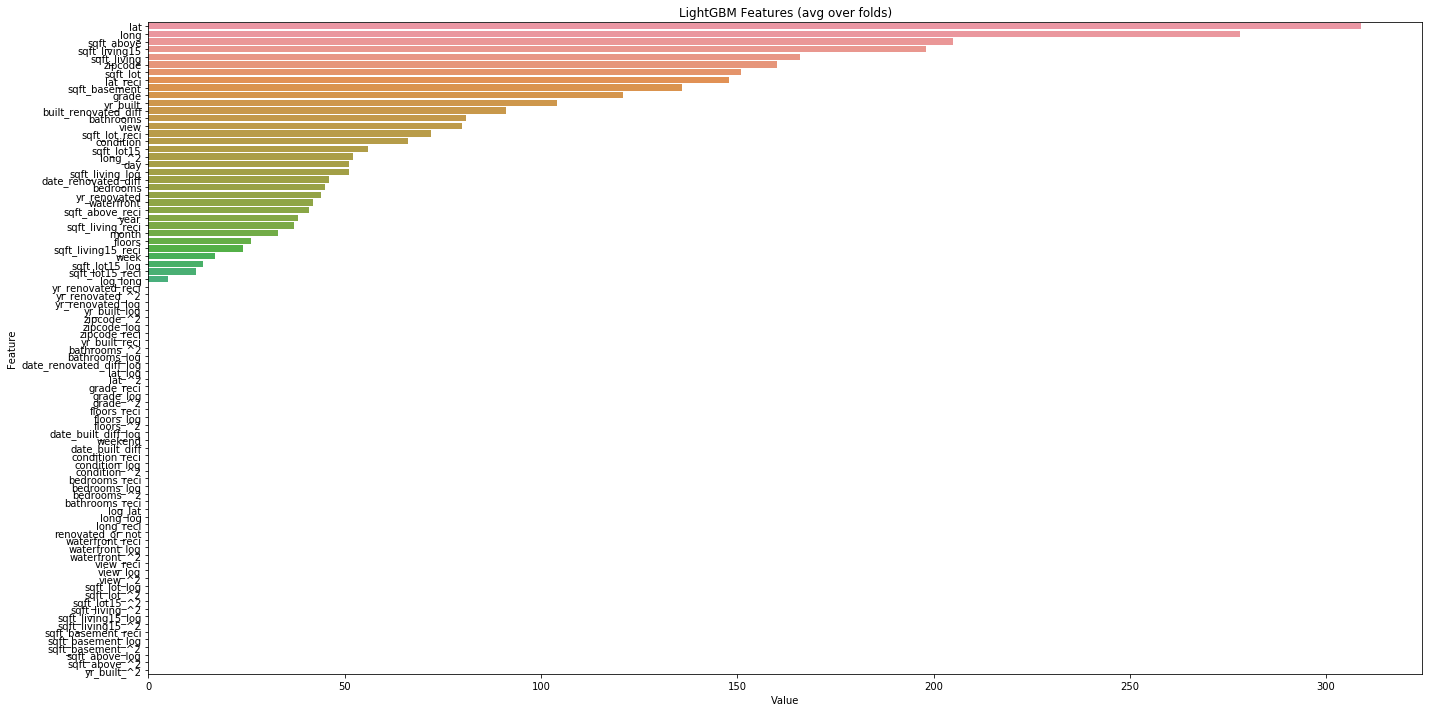

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [17]:
lgb_sub = pd.DataFrame({'id' : test2.id, 'price' : lgb_pred})
lgb_sub.to_csv('../sub/190312_lgb_base3.csv', index = False) #120459.06824 